In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive'

"azka's CV.docx"  'Colab Notebooks'   images   NoteBooks


In [4]:
original_dataset_dir = './drive/My Drive/images'
base_dir = './drive/My Drive/Colab Notebooks/work'

In [9]:
#Making Working folder
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_azka_dir = os.path.join(train_dir, 'Azka')
train_fahad_dir = os.path.join(train_dir, 'Fahad')
validation_azka_dir = os.path.join(validation_dir, 'Azka')
validation_fahad_dir = os.path.join(validation_dir, 'Fahad')
test_azka_dir = os.path.join(test_dir, 'Azka')
test_fahad_dir = os.path.join(test_dir, 'Fahad')

In [11]:
#Making Directories /Folders run it once
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

os.mkdir(train_azka_dir)
os.mkdir(train_fahad_dir)
os.mkdir(validation_azka_dir)
os.mkdir(validation_fahad_dir)
os.mkdir(test_azka_dir)
os.mkdir(test_fahad_dir)

In [6]:
print('total training Azka images:', len(os.listdir(train_azka_dir)))
print('total training Fahad images:', len(os.listdir(train_fahad_dir)))
print('total validation Azka images:', len(os.listdir(validation_azka_dir)))
print('total validation Fahad images:', len(os.listdir(validation_fahad_dir)))
print('total test Azka images:', len(os.listdir(test_azka_dir)))
print('total test Fahad images:', len(os.listdir(test_fahad_dir)))

total training Azka images: 13
total training Fahad images: 14
total validation Azka images: 4
total validation Fahad images: 4
total test Azka images: 5
total test Fahad images: 5


./drive/My Drive/images/azka1.jpeg


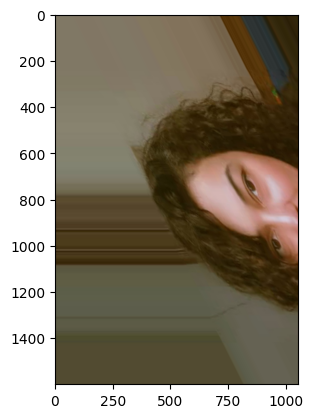

In [7]:
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[1

                                                                                  ])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

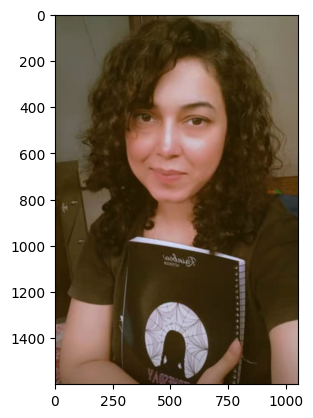

In [15]:
plt.imshow(img);

In [8]:
# Azka image data
azka_files = ['azka{}.jpeg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in azka_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_azka_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_azka_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_azka_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_azka_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_azka_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)


In [9]:
# Fahad image
fahad_files = ['fahad{}.jpeg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in fahad_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_fahad_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_fahad_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_fahad_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_fahad_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)


In [10]:

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_fahad_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [21]:
print('total training azka images:', len(os.listdir(train_azka_dir)))
print('total training fahad images:', len(os.listdir(train_fahad_dir)))
print('total validation azka images:', len(os.listdir(validation_azka_dir)))
print('total validation fahad images:', len(os.listdir(validation_fahad_dir)))

total training azka images: 13
total training fahad images: 14
total validation azka images: 0
total validation fahad images: 0


Building model

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

#convolutional base
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#Flatten
model.add(layers.Flatten())

#Dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 27 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/100 ━━━━━━━━━━━━━━━━━━━━ 1:48 1s/step - acc: 0.3466 - loss: 0.6995

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - acc: 0.4062 - loss: 0.6982 - val_acc: 0.5000 - val_loss: 0.6906
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.5205 - loss: 0.6938 - val_acc: 0.5000 - val_loss: 0.6887
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.5219 - loss: 0.6927 - val_acc: 0.5000 - val_loss: 0.6869
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.5183 - loss: 0.6727 - val_acc: 0.5000 - val_loss: 0.6842
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.5176 - loss: 0.6676 - val_acc: 0.5000 - val_loss: 0.6788
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - acc: 0.5183 - loss: 0.6581 - val_acc: 0.5000 - val_loss: 0.6726
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.5183 - loss: 0.6497 - val_acc: 0.5000 - val_loss: 0.6727
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.5205 - loss: 0.6709 - val_acc: 0.5000 - val_loss: 0.6599
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.

In [17]:
model.save("azka_and_fahad_1.h5")

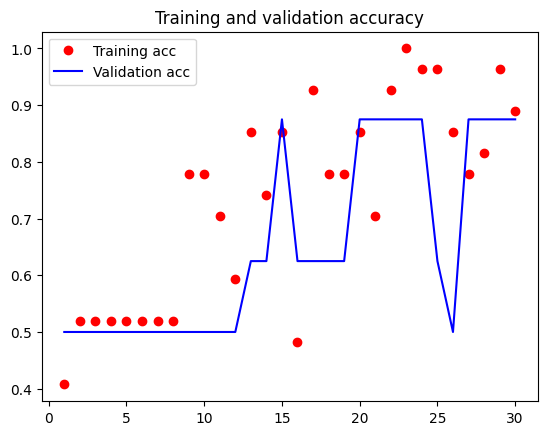

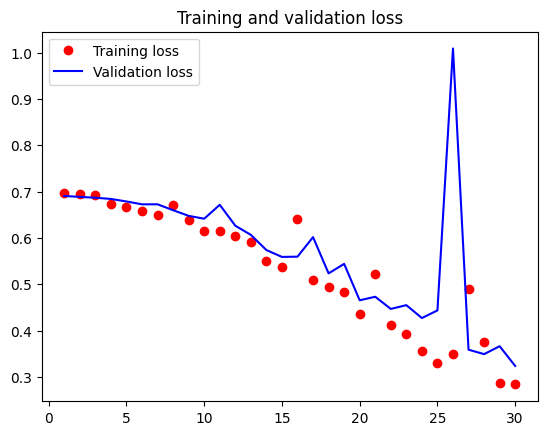

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

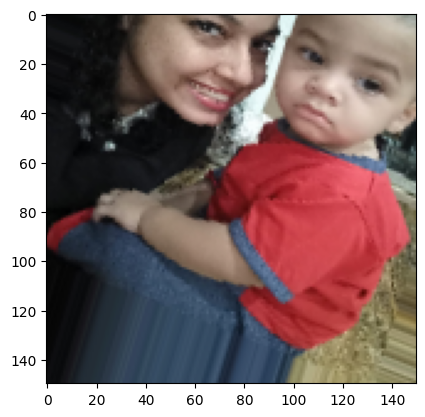

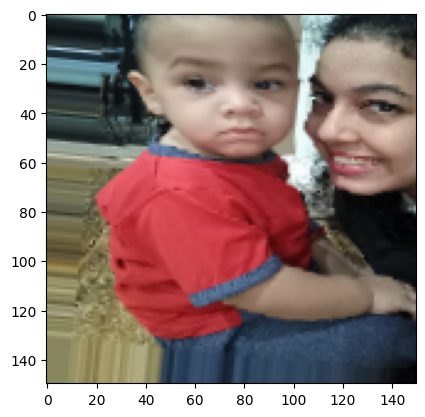

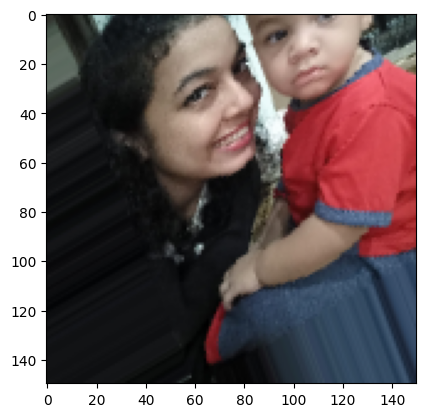

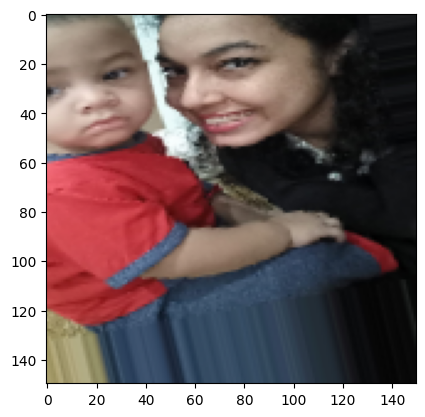

In [20]:
from keras.preprocessing import image

fnames = [os.path.join(train_azka_dir, fname) for
          fname in os.listdir(train_azka_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 27 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - acc: 0.5148 - loss: 0.6929 - val_acc: 0.5000 - val_loss: 0.6872
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.5205 - loss: 0.7134 - val_acc: 0.5000 - val_loss: 0.6911
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.4824 - loss: 0.7009 - val_acc: 0.5000 - val_loss: 0.6902
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.5205 - loss: 0.7021 - val_acc: 0.5000 - val_loss: 0.6970
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.5176 - loss: 0.6788 - val_acc: 0.5000 - val_loss: 0.6904
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.5183 - loss: 0.6720 - val_acc: 0.5000 - val_loss: 0.6897
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.5198 - loss: 0.7054 - val_acc: 0.7500 - val_loss: 0.6780
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.7052 - loss: 0.6741 - val_acc: 0.7500 - val_loss: 0.6738
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
model.save('azka_and_fahad_small_2.h5')

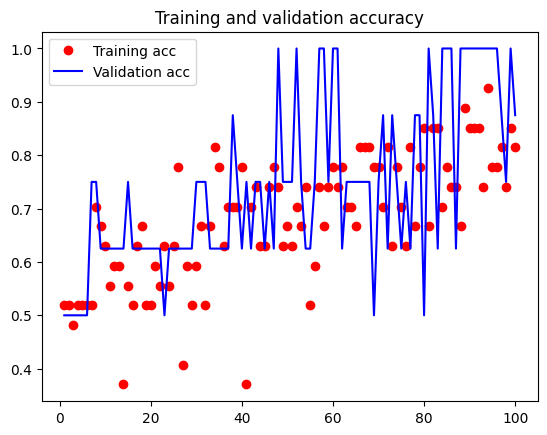

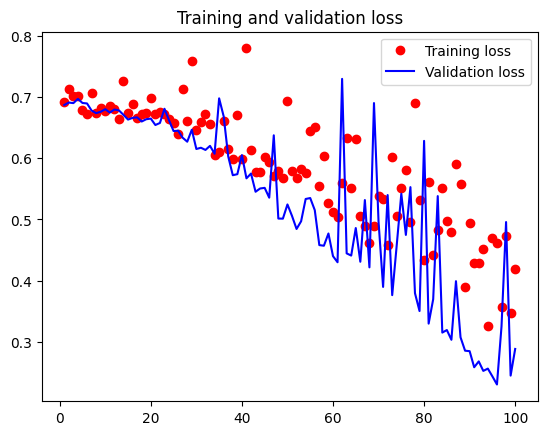

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
predict_dir_path ='./drive/My Drive/images/'

In [29]:
from os import listdir
from os.path import isfile, join

onlyfiles = [x for x in listdir(predict_dir_path) if isfile(join(predict_dir_path,x))]
print(onlyfiles)

['azka2.jpeg', 'azka1.jpeg', 'fahad1.jpeg', 'fahad2.jpeg', 'azka3.jpeg', 'fahad3.jpeg', 'azka4.jpeg', 'azka5.jpeg', 'fahad4.jpeg', 'fahad5.jpeg', 'fahad6.jpeg', 'azka6.jpeg', 'fahad7.jpeg', 'azka7.jpeg', 'azka8.jpeg', 'azka9.jpeg', 'azka10.jpeg', 'fahad8.jpeg', 'fahad9.jpeg', 'fahad10.jpeg', 'azka11.jpeg', 'azka12.jpeg', 'fahad11.jpeg', 'fahad12.jpeg', 'fahad13.jpeg', 'azka13.jpeg', 'fahad14.jpeg']


In [32]:
# predicting images
from keras.preprocessing import image
import numpy as np # Import numpy
azka_counter = 0
fahad_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = classes[0][0]

    if classes == 0:
        print(file + ": " + 'azka')
        azka_counter += 1
    else:
        print(file + ": " + 'fahad')
        fahad_counter += 1
print("Total azka :",azka_counter)
print("Total fahad :",fahad_counter)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
azka2.jpeg: azka
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
azka1.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
fahad1.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
fahad2.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
azka3.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
fahad3.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
azka4.jpeg: azka
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
azka5.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
fahad4.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
fahad5.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
fahad6.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
azka6.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
fahad7.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
azka7.jpeg: azka
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
azka8.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
azka9.jpeg: fahad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
azka10.jpeg: azka
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
fahad